In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
# We will analyze DA job postings just in Canada

df_DA_CA = df[(df['job_country']=='Canada') & (df['job_title_short']=='Data Analyst')]

In [5]:
df_DA_CA.size

40205

In [10]:
#Summary of job postings, top cities, converting to data frame 

df_plot = df_DA_CA['job_location'].value_counts().head(10).to_frame()

df_plot

,count
job_location,
Canada,1230
Anywhere,496
"Calgary, AB, Canada",152
"Toronto, ON, Canada",93
"Edmonton, AB, Canada",76
"Fort McMurray, AB, Canada",30
"Winnipeg, MB, Canada",30
"Mississauga, ON, Canada",29
"Vancouver, BC, Canada",24


In [11]:
# install seaborn

!conda install seaborn -y

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [12]:
import seaborn as sns

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_40002/4126391344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_location', palette='magma')


Text(0, 0.5, '')

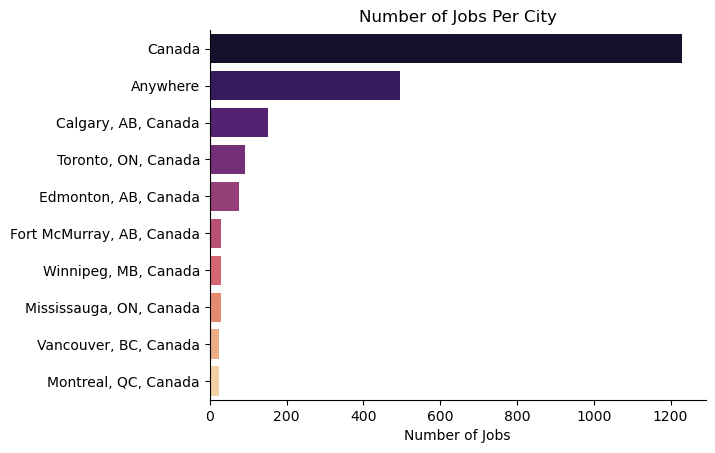

In [30]:
# bar plot using seaborn

sns.barplot(data=df_plot, x='count', y='job_location', palette='magma')
sns.despine() # removes border 
plt.title('Number of Jobs Per City')
plt.xlabel('Number of Jobs')
plt.ylabel('')

Text(0.5, 1.0, 'Distribution of Jobs Mentioning Degrees for CA Job Postings')

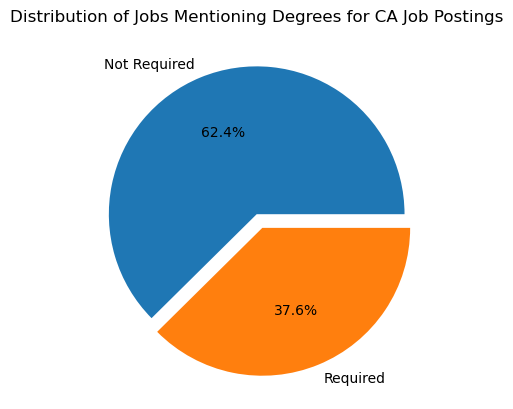

In [45]:
# Pie plot for degree required

plt.pie(df_DA_CA['job_no_degree_mention'].value_counts(), labels=['Not Required', 'Required'], explode=(0, 0.1), autopct='%1.1f%%')

plt.title('Distribution of Jobs Mentioning Degrees for CA Job Postings')

In [43]:
df_DA_CA['job_no_degree_mention'].value_counts()

job_no_degree_mention
False    1476
True      889
Name: count, dtype: int64

Text(0.5, 1.0, 'Work from Home Offered')

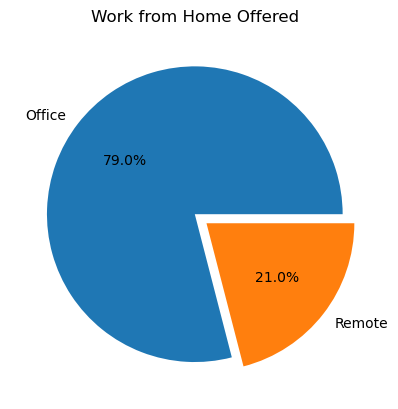

In [42]:
# Pie plot for remove / not remove 

plt.pie(df_DA_CA['job_work_from_home'].value_counts(), labels=['Office', 'Remote'], explode=(0, 0.1), autopct='%1.1f%%')

plt.title('Work from Home Offered')

In [46]:
df_DA_CA['job_work_from_home'].value_counts()

job_work_from_home
False    1869
True      496
Name: count, dtype: int64

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_40002/2561942153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot2, x='count', y='company_name', palette='magma')


Text(0, 0.5, '')

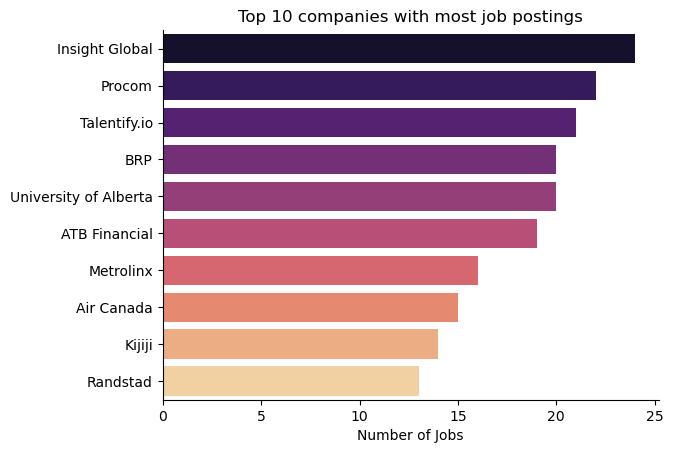

In [51]:
# bar plot using seaborn for Top 10 companies with the most job postings

df_plot2 = df_DA_CA['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot2, x='count', y='company_name', palette='magma')
sns.despine() # removes border 
plt.title('Top 10 companies with the most job postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')

In [59]:
#removing nun values for finding median annual salary values for DA in Canada

avarage_salary = df_DA_CA.dropna(subset='salary_year_avg')

/var/folders/jq/9vrfyvt57yv6zsk7ddnttm3h0000gn/T/ipykernel_40002/3637497345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=avarage_salary, x='salary_year_avg', y='job_title_short', palette='magma')


(0.0, 140000.0)

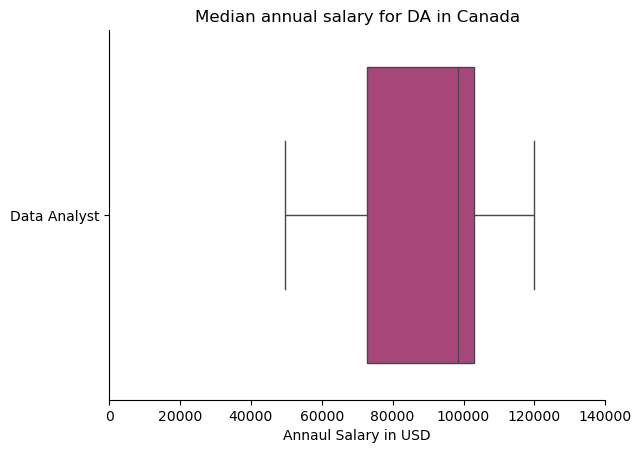

In [72]:
# boxplot of median DA salary in CA

sns.boxplot(data=avarage_salary, x='salary_year_avg', y='job_title_short', palette='magma')
sns.despine()
plt.title('Median annual salary for DA in Canada')
plt.xlabel('Annaul Salary in USD')
plt.ylabel('')
plt.xlim(0, 140_000)
